### Movie recommendation system

In [1]:
import numpy as np
import pandas as pd
import warnings
warnings.filterwarnings('ignore')

####  Get dataset

In [2]:
column_names=["user_id","item_id","rating","timestamp"]
df=pd.read_csv("ml-100k/u.data",sep='\t',names=column_names)

In [3]:
df.head()

,user_id,item_id,rating,timestamp
0,196,242,3,881250949
1,186,302,3,891717742
2,22,377,1,878887116
3,244,51,2,880606923
4,166,346,1,886397596


In [4]:
df.shape

(100000, 4)

In [5]:
df['user_id'].nunique()

943

In [6]:
df['item_id'].nunique()  ### unique movies

1682

In [7]:
movies_title=pd.read_csv(r'ml-100k\u.item', sep="\|" , header=None,encoding="latin")

In [8]:
movies_title.tail()

,0,1,2,3,4,5,6,7,8,9,...,14,15,16,17,18,19,20,21,22,23
1677,1678,Mat' i syn (1997),06-Feb-1998,NaN,http://us.imdb.com/M/title-exact?Mat%27+i+syn+...,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1678,1679,B. Monkey (1998),06-Feb-1998,NaN,http://us.imdb.com/M/title-exact?B%2E+Monkey+(...,0,0,0,0,0,...,0,0,0,0,0,1,0,1,0,0
1679,1680,Sliding Doors (1998),01-Jan-1998,NaN,http://us.imdb.com/Title?Sliding+Doors+(1998),0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
1680,1681,You So Crazy (1994),01-Jan-1994,NaN,http://us.imdb.com/M/title-exact?You%20So%20Cr...,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1681,1682,Scream of Stone (Schrei aus Stein) (1991),08-Mar-1996,NaN,http://us.imdb.com/M/title-exact?Schrei%20aus%...,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [9]:
movies_title.shape

(1682, 24)

In [10]:
movies_title=movies_title[[0,1]]

In [11]:
movies_title.columns=['item_id','title']

In [12]:
movies_title.head()

,item_id,title
0,1,Toy Story (1995)
1,2,GoldenEye (1995)
2,3,Four Rooms (1995)
3,4,Get Shorty (1995)
4,5,Copycat (1995)


In [13]:
df=pd.merge(df,movies_title,on="item_id")

#### Performing EDA

In [14]:
import matplotlib.pyplot as plt
import seaborn as sns

In [15]:
df.head()

,user_id,item_id,rating,timestamp,title
0,196,242,3,881250949,Kolya (1996)
1,63,242,3,875747190,Kolya (1996)
2,226,242,5,883888671,Kolya (1996)
3,154,242,3,879138235,Kolya (1996)
4,306,242,5,876503793,Kolya (1996)


In [16]:
df.groupby('title').mean()

,user_id,item_id,rating,timestamp
title,,,,
'Til There Was You (1997),383.777778,1300.0,2.333333,8.861152e+08
1-900 (1994),477.000000,1353.0,2.600000,8.797260e+08
101 Dalmatians (1996),450.330275,225.0,2.908257,8.829281e+08
12 Angry Men (1957),453.552000,178.0,4.344000,8.828963e+08
187 (1997),517.097561,330.0,3.024390,8.850084e+08
...,...,...,...,...
Young Guns II (1990),504.068182,1188.0,2.772727,8.821855e+08
"Young Poisoner's Handbook, The (1995)",452.487805,547.0,3.341463,8.821438e+08
Zeus and Roxanne (1997),532.833333,1164.0,2.166667,8.775338e+08


In [17]:
df.groupby('title').mean()['rating'].sort_values(ascending=False)

title
They Made Me a Criminal (1939)                  5.0
Marlene Dietrich: Shadow and Light (1996)       5.0
Saint of Fort Washington, The (1993)            5.0
Someone Else's America (1995)                   5.0
Star Kid (1997)                                 5.0
                                               ... 
Eye of Vichy, The (Oeil de Vichy, L') (1993)    1.0
King of New York (1990)                         1.0
Touki Bouki (Journey of the Hyena) (1973)       1.0
Bloody Child, The (1996)                        1.0
Crude Oasis, The (1995)                         1.0
Name: rating, Length: 1664, dtype: float64

In [18]:
df.groupby('title').count()['rating'].sort_values(ascending=False)

title
Star Wars (1977)                      583
Contact (1997)                        509
Fargo (1996)                          508
Return of the Jedi (1983)             507
Liar Liar (1997)                      485
                                     ... 
Great Day in Harlem, A (1994)           1
Other Voices, Other Rooms (1997)        1
Good Morning (1971)                     1
Girls Town (1996)                       1
Á köldum klaka (Cold Fever) (1994)      1
Name: rating, Length: 1664, dtype: int64

In [19]:
ratings=pd.DataFrame(df.groupby('title').mean()['rating'])

In [20]:
ratings.head()

,rating
title,
'Til There Was You (1997),2.333333
1-900 (1994),2.600000
101 Dalmatians (1996),2.908257
12 Angry Men (1957),4.344000
187 (1997),3.024390


In [21]:
ratings['num of ratings']=pd.DataFrame(df.groupby('title').count()['rating'])

In [22]:
ratings

,rating,num of ratings
title,,
'Til There Was You (1997),2.333333,9
1-900 (1994),2.600000,5
101 Dalmatians (1996),2.908257,109
12 Angry Men (1957),4.344000,125
187 (1997),3.024390,41
...,...,...
Young Guns II (1990),2.772727,44
"Young Poisoner's Handbook, The (1995)",3.341463,41
Zeus and Roxanne (1997),2.166667,6


In [23]:
ratings.sort_values(by='rating',ascending=False)

,rating,num of ratings
title,,
They Made Me a Criminal (1939),5.0,1
Marlene Dietrich: Shadow and Light (1996),5.0,1
"Saint of Fort Washington, The (1993)",5.0,2
Someone Else's America (1995),5.0,1
Star Kid (1997),5.0,3
...,...,...
"Eye of Vichy, The (Oeil de Vichy, L') (1993)",1.0,1
King of New York (1990),1.0,1
Touki Bouki (Journey of the Hyena) (1973),1.0,1


<function matplotlib.pyplot.show(close=None, block=None)>

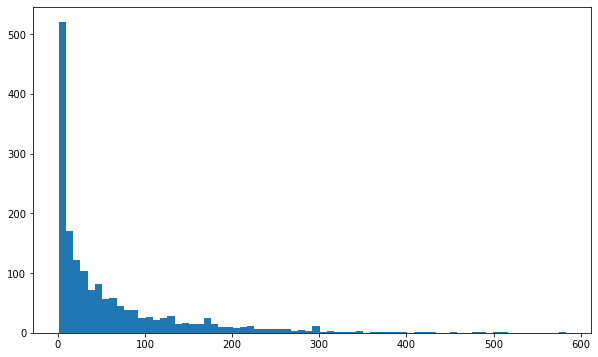

In [24]:
plt.figure(figsize=(10,6))
plt.hist(ratings['num of ratings'],bins=70)
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

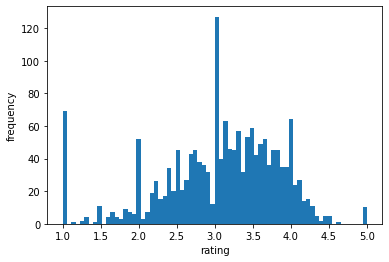

In [25]:
plt.hist(ratings['rating'],bins=70)
plt.xlabel('rating')
plt.ylabel('frequency')
plt.show

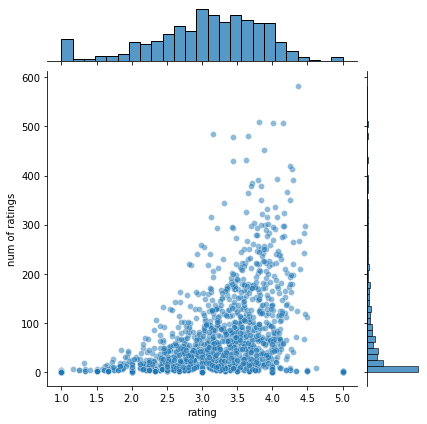

In [26]:
sns.jointplot(x='rating',y='num of ratings',data=ratings, alpha= 0.5)

######  ->>as the no.of rating increases rating increases i.e increses lineraly

### Model creation

In [27]:
moviemat=df.pivot_table(index='user_id',columns='title',values='rating')

In [28]:
moviemat

title,'Til There Was You (1997),1-900 (1994),101 Dalmatians (1996),12 Angry Men (1957),187 (1997),2 Days in the Valley (1996),"20,000 Leagues Under the Sea (1954)",2001: A Space Odyssey (1968),3 Ninjas: High Noon At Mega Mountain (1998),"39 Steps, The (1935)",...,Yankee Zulu (1994),Year of the Horse (1997),You So Crazy (1994),Young Frankenstein (1974),Young Guns (1988),Young Guns II (1990),"Young Poisoner's Handbook, The (1995)",Zeus and Roxanne (1997),unknown,Á köldum klaka (Cold Fever) (1994)
user_id,,,,,,,,,,,,,,,,,,,,,
1,NaN,NaN,2.0,5.0,NaN,NaN,3.0,4.0,NaN,NaN,...,NaN,NaN,NaN,5.0,3.0,NaN,NaN,NaN,4.0,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,2.0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,NaN,NaN,2.0,NaN,NaN,NaN,NaN,4.0,NaN,NaN,...,NaN,NaN,NaN,4.0,NaN,NaN,NaN,NaN,4.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
939,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
940,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
941,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [29]:
ratings.sort_values("num of ratings",ascending=False)

,rating,num of ratings
title,,
Star Wars (1977),4.358491,583
Contact (1997),3.803536,509
Fargo (1996),4.155512,508
Return of the Jedi (1983),4.007890,507
Liar Liar (1997),3.156701,485
...,...,...
"Great Day in Harlem, A (1994)",5.000000,1
"Other Voices, Other Rooms (1997)",3.000000,1
Good Morning (1971),1.000000,1


In [30]:
starwars_user_ratings=moviemat['Star Wars (1977)']

In [31]:
starwars_user_ratings.head()

user_id
1    5.0
2    5.0
3    NaN
4    5.0
5    4.0
Name: Star Wars (1977), dtype: float64

In [32]:
similar_to_starwars=moviemat.corrwith(starwars_user_ratings)

In [33]:
similar_to_starwars

title
'Til There Was You (1997)                0.872872
1-900 (1994)                            -0.645497
101 Dalmatians (1996)                    0.211132
12 Angry Men (1957)                      0.184289
187 (1997)                               0.027398
                                           ...   
Young Guns II (1990)                     0.228615
Young Poisoner's Handbook, The (1995)   -0.007374
Zeus and Roxanne (1997)                  0.818182
unknown                                  0.723123
Á köldum klaka (Cold Fever) (1994)            NaN
Length: 1664, dtype: float64

In [34]:
corr_starwars=pd.DataFrame(similar_to_starwars,columns=['Correlation'])

In [35]:
corr_starwars.dropna(inplace=True)

In [36]:
corr_starwars.head()

,Correlation
title,
'Til There Was You (1997),0.872872
1-900 (1994),-0.645497
101 Dalmatians (1996),0.211132
12 Angry Men (1957),0.184289
187 (1997),0.027398


In [37]:
corr_starwars.sort_values('Correlation',ascending=False).head(10)
### highly correlated

,Correlation
title,
Hollow Reed (1996),1.0
Commandments (1997),1.0
Cosi (1996),1.0
No Escape (1994),1.0
Stripes (1981),1.0
Star Wars (1977),1.0
Man of the Year (1995),1.0
"Beans of Egypt, Maine, The (1994)",1.0
"Old Lady Who Walked in the Sea, The (Vieille qui marchait dans la mer, La) (1991)",1.0


In [38]:
corr_starwars=corr_starwars.join(ratings['num of ratings'])

In [39]:
corr_starwars.head()

,Correlation,num of ratings
title,,
'Til There Was You (1997),0.872872,9
1-900 (1994),-0.645497,5
101 Dalmatians (1996),0.211132,109
12 Angry Men (1957),0.184289,125
187 (1997),0.027398,41


In [40]:
corr_starwars[corr_starwars['num of ratings']>100].sort_values('Correlation',ascending=False)

,Correlation,num of ratings
title,,
Star Wars (1977),1.000000,583
"Empire Strikes Back, The (1980)",0.747981,367
Return of the Jedi (1983),0.672556,507
Raiders of the Lost Ark (1981),0.536117,420
Austin Powers: International Man of Mystery (1997),0.377433,130
...,...,...
"Edge, The (1997)",-0.127167,113
As Good As It Gets (1997),-0.130466,112
Crash (1996),-0.148507,128


###  Predict system

In [41]:
def predict_movies(movie_name):
    movie_user_ratings = moviemat[movie_name]
    similar_to_movie = moviemat.corrwith(movie_user_ratings)
    
    corr_movie = pd.DataFrame(similar_to_movie,columns=['Correlation'])
    corr_movie.dropna(inplace=True)
    
    corr_movie = corr_movie.join(ratings['num of ratings'])
    predictions = corr_movie[corr_movie['num of ratings']>100].sort_values('Correlation',ascending=False)
    
    return predictions

In [42]:
predictions = predict_movies("Titanic (1997)")

In [43]:
predictions.head()

,Correlation,num of ratings
title,,
Titanic (1997),1.000000,350
"River Wild, The (1994)",0.497600,146
"Abyss, The (1989)",0.472103,151
Bram Stoker's Dracula (1992),0.443560,120
True Lies (1994),0.435104,208


###### Data scraping for language and genre

In [44]:
df2=pd.read_csv("movie.metadata.tsv",sep="\t",header=None)

In [45]:
df2.head(10)

,0,1,2,3,4,5,6,7,8
0,975900,/m/03vyhn,Ghosts of Mars,2001-08-24,14010832.0,98.0,"{""/m/02h40lc"": ""English Language""}","{""/m/09c7w0"": ""United States of America""}","{""/m/01jfsb"": ""Thriller"", ""/m/06n90"": ""Science..."
1,3196793,/m/08yl5d,Getting Away with Murder: The JonBenét Ramsey ...,2000-02-16,NaN,95.0,"{""/m/02h40lc"": ""English Language""}","{""/m/09c7w0"": ""United States of America""}","{""/m/02n4kr"": ""Mystery"", ""/m/03bxz7"": ""Biograp..."
2,28463795,/m/0crgdbh,Brun bitter,1988,NaN,83.0,"{""/m/05f_3"": ""Norwegian Language""}","{""/m/05b4w"": ""Norway""}","{""/m/0lsxr"": ""Crime Fiction"", ""/m/07s9rl0"": ""D..."
3,9363483,/m/0285_cd,White Of The Eye,1987,NaN,110.0,"{""/m/02h40lc"": ""English Language""}","{""/m/07ssc"": ""United Kingdom""}","{""/m/01jfsb"": ""Thriller"", ""/m/0glj9q"": ""Erotic..."
4,261236,/m/01mrr1,A Woman in Flames,1983,NaN,106.0,"{""/m/04306rv"": ""German Language""}","{""/m/0345h"": ""Germany""}","{""/m/07s9rl0"": ""Drama""}"
5,13696889,/m/03cfc81,The Gangsters,1913-05-29,NaN,35.0,"{""/m/06ppq"": ""Silent film"", ""/m/02h40lc"": ""Eng...","{""/m/09c7w0"": ""United States of America""}","{""/m/02hmvc"": ""Short Film"", ""/m/06ppq"": ""Silen..."
6,18998739,/m/04jcqvw,The Sorcerer's Apprentice,2002,NaN,86.0,"{""/m/02h40lc"": ""English Language""}","{""/m/0hzlz"": ""South Africa""}","{""/m/0hqxf"": ""Family Film"", ""/m/01hmnh"": ""Fant..."
7,10408933,/m/02qc0j7,Alexander's Ragtime Band,1938-08-16,3600000.0,106.0,"{""/m/02h40lc"": ""English Language""}","{""/m/09c7w0"": ""United States of America""}","{""/m/04t36"": ""Musical"", ""/m/01z4y"": ""Comedy"", ..."
8,9997961,/m/06_y2j7,Contigo y aquí,1974,NaN,NaN,"{""/m/06nm1"": ""Spanish Language""}","{""/m/0jgd"": ""Argentina""}","{""/m/04t36"": ""Musical"", ""/m/07s9rl0"": ""Drama"",..."
9,2345652,/m/075f66,City of the Dead,1960,NaN,76.0,"{""/m/02h40lc"": ""English Language""}","{""/m/07ssc"": ""United Kingdom""}","{""/m/03npn"": ""Horror"", ""/m/0fdjb"": ""Supernatur..."


In [46]:
df2.drop(0,axis=1,inplace=True)
df2.drop(1,axis=1,inplace=True)
df2.drop(3,axis=1,inplace=True)
df2.drop(4,axis=1,inplace=True)
df2.drop(5,axis=1,inplace=True)
df2.drop(7,axis=1,inplace=True)

In [47]:
df2.head()

,2,6,8
0,Ghosts of Mars,"{""/m/02h40lc"": ""English Language""}","{""/m/01jfsb"": ""Thriller"", ""/m/06n90"": ""Science..."
1,Getting Away with Murder: The JonBenét Ramsey ...,"{""/m/02h40lc"": ""English Language""}","{""/m/02n4kr"": ""Mystery"", ""/m/03bxz7"": ""Biograp..."
2,Brun bitter,"{""/m/05f_3"": ""Norwegian Language""}","{""/m/0lsxr"": ""Crime Fiction"", ""/m/07s9rl0"": ""D..."
3,White Of The Eye,"{""/m/02h40lc"": ""English Language""}","{""/m/01jfsb"": ""Thriller"", ""/m/0glj9q"": ""Erotic..."
4,A Woman in Flames,"{""/m/04306rv"": ""German Language""}","{""/m/07s9rl0"": ""Drama""}"


In [48]:
df2.shape

(81741, 3)

In [49]:
df2.rename(columns={2:'movie',6:'language',8:'genre'},inplace=True)

In [50]:
df2.columns

Index(['movie', 'language', 'genre'], dtype='object')

In [51]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 81741 entries, 0 to 81740
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   movie     81741 non-null  object
 1   language  81741 non-null  object
 2   genre     81741 non-null  object
dtypes: object(3)
memory usage: 1.9+ MB


In [52]:
df2.isnull().sum()

movie       0
language    0
genre       0
dtype: int64

In [53]:
df2.duplicated()

0        False
1        False
2        False
3        False
4        False
         ...  
81736    False
81737    False
81738    False
81739    False
81740    False
Length: 81741, dtype: bool

In [54]:
df2['language'].unique()

array(['{"/m/02h40lc": "English Language"}',
       '{"/m/05f_3": "Norwegian Language"}',
       '{"/m/04306rv": "German Language"}', ...,
       '{"/m/03k50": "Hindi Language", "/m/064r7fk": "Standard Tibetan", "/m/02h40lc": "English Language"}',
       '{"/m/06nm1": "Spanish Language", "/m/04306rv": "German Language", "/m/02h40lc": "English Language", "/m/02ztjwg": "Hungarian language"}',
       '{"/m/02bjrlw": "Italian Language", "/m/02h40lc": "English Language", "/m/05f_3": "Norwegian Language"}'],
      dtype=object)

In [55]:
df2['genre'].unique()

array(['{"/m/01jfsb": "Thriller", "/m/06n90": "Science Fiction", "/m/03npn": "Horror", "/m/03k9fj": "Adventure", "/m/0fdjb": "Supernatural", "/m/02kdv5l": "Action", "/m/09zvmj": "Space western"}',
       '{"/m/02n4kr": "Mystery", "/m/03bxz7": "Biographical film", "/m/07s9rl0": "Drama", "/m/0hj3n01": "Crime Drama"}',
       '{"/m/0lsxr": "Crime Fiction", "/m/07s9rl0": "Drama"}', ...,
       '{"/m/0lsxr": "Crime Fiction", "/m/01jfsb": "Thriller", "/m/01z4y": "Comedy", "/m/0fdjb": "Supernatural"}',
       '{"/m/01z02hx": "Sports", "/m/0lsxr": "Crime Fiction", "/m/02kdv5l": "Action", "/m/07s9rl0": "Drama"}',
       '{"/m/06n90": "Science Fiction", "/m/0gw5n2f": "Japanese Movies", "/m/03k9fj": "Adventure", "/m/0hcr": "Animation", "/m/02hmvc": "Short Film", "/m/0jxy": "Anime", "/m/07s9rl0": "Drama"}'],
      dtype=object)

In [56]:
#l=[]
#i=['{"/m/03k50": "Hindi Language", "/m/064r7fk": "Standard Tibetan", "/m/02h40lc": "English Language"}','{"/m/02bjrlw": "Italian Language", "/m/02h40lc": "English Language", "/m/05f_3": "Norwegian Language"}']
#for s in i:
#k=s.split(",")
#for v in k:
#    w=v.split(":")
#    print(w)
#     t=w[1].split(" ")[1]
#      print(t)
#       l.append(t.split("\"")[1])
#print(l) 


In [57]:
def lang(s):
    l=[]
    for i in range(0,81741):
        if df2['language'][i].find(s)!=-1:
            l.append(i)
    for i in l[0:10]:
        print(df2['movie'][i])

In [58]:
def gen(s):
    t=[]
    for i in range(0,81741):
        if df2['genre'][i].find(s)!=-1:
            t.append(i)
    for i in t[0:10]:
        print(df2['movie'][i])

In [59]:
def switch(c,s):
    if c==1:
        lang(s)
    elif c==2:
        gen(s)
    elif c==3:
        predictions=predict_movies(s)
        print(predictions.head(10))

In [63]:
print("1. Movies by language")
print("2. Movies by genre")
print("3. Movies by movie name")
c=int(input("enter choice"))
s=str(input("enter value"))
print("==============================================================================================")
switch(c,s)

1. Movies by language
2. Movies by genre
3. Movies by movie name
enter choice1
enter valueHindi
Bindiya Chamkegi
Anokha Rishta
Jay Vejay
Chandra Mukhi
Zindagi
My Friend Ganesha
Aaj Ka Andha Kanoon
The Hero: Love Story of a Spy
Raampur Ka Lakshman
Swati
